XOR PMC

In [4]:
import ctypes
import random
import matplotlib.pyplot as plt

lib = ctypes.cdll.LoadLibrary('./libadd.so')

Fonctions utiles

In [5]:
def perceptron( hidden_Layer, neurons, random, data, bias, size, lib, nb_Class, prediction, learning_rate):
    func = lib.perceptron
    func.restype = ctypes.c_double
    func.argtypes = (ctypes.c_int, ctypes.c_int, ctypes.c_int ,ctypes.POINTER(ctypes.c_double), ctypes.c_double, ctypes.c_int, ctypes.c_int, ctypes.POINTER(ctypes.c_int), ctypes.c_double)
    data_array = (ctypes.c_double * len(data))(*data)
    prediction_array = (ctypes.c_int * len(prediction))(*prediction)
    res = func(hidden_Layer, neurons, random, data_array, bias ,size, nb_Class, prediction_array, learning_rate)
    return res

def get_file(hidden_Layer, neurons, random, size_image, lib, nb_Class):
    func = lib.create_file
    func.restype = None
    func.argtypes = (ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_int)
    func(hidden_Layer, neurons, random, size_image, nb_Class)

def display_results(val1, val2, val3, val4):
    print("0,0: ", val1)
    print("0,1: ", val2)
    print("1,0: ", val3)
    print("1,1: ", val4)

Attribution des variables

In [9]:
nb_Class = 1
rand = 1
hidden_Layer = 1
neurons = 10
bias = 1


learning_rate = -0.01
epoch = 1000
val1 = 0
val2 = 0
val3 = 0
val4 = 0
expected = [-1, 1, 1, -1]
predictions = []

Entrainement du PMC

In [10]:
get_file(hidden_Layer, neurons, rand, 2, lib, nb_Class)
for i in range(epoch):
    a = random.randint(0, 3)
    if a == 0:
        val1 = perceptron(hidden_Layer, neurons, rand, [-1,-1], bias, 2, lib, nb_Class, [-1], learning_rate)
        if val1 <= 0:
            print(f'Epoch {i}, result :{True}, loss: {-1-val1}, val : {val1}')
        else:
            print(f'Epoch {i}, result :{True}, loss: {-1-val1}, val : {val1}')
        predictions.append(val1)
    if a == 1:
        val2 = perceptron(hidden_Layer, neurons, rand, [1,-1], bias, 2, lib, nb_Class, [1], learning_rate)
        if val2 >= 0:
            print(f'Epoch {i}, result :{True}, loss: {1-val2}, val : {val2}')
        else:
            print(f'Epoch {i}, result :{False}, loss: {1-val2} val : {val2}')
        predictions.append(val2)
    if a == 2:
        val3 = perceptron(hidden_Layer, neurons, rand, [-1,1], bias, 2, lib, nb_Class, [1], learning_rate)
        if val3 >= 0:
            print(f'Epoch {i}, result :{True}, loss: {1-val3}, val : {val3}')
        else:
            print(f'Epoch {i}, result :{False}, loss: {1-val3}, val : {val3}')
        predictions.append(val3)
    if a == 3:
        val4 = perceptron(hidden_Layer, neurons, rand, [1,1], bias, 2, lib, nb_Class, [-1], learning_rate)
        if val4 <= -0:
            print(f'Epoch {i}, result :{True}, loss: {-1-val4}, val : {val4}')
        else:
            print(f'Epoch {i}, result :{False}, loss: {-1-val4}, val : {val4}')
        predictions.append(val4)


Epoch 0, result :False, loss: 1.9779743333301998, val : -0.9779743333301998

Epoch 1, result :True, loss: -0.18654820497762703, val : -0.813451795022373

Epoch 2, result :True, loss: -0.18015503134820787, val : -0.8198449686517921

Epoch 3, result :True, loss: -0.1741707294003776, val : -0.8258292705996224

Epoch 4, result :True, loss: -0.16855682191777477, val : -0.8314431780822252

Epoch 5, result :False, loss: 1.9671776071428209, val : -0.967177607142821

Epoch 6, result :True, loss: -1.9972545248074658, val : 0.9972545248074657

Epoch 7, result :True, loss: -0.18489358296047276, val : -0.8151064170395272

Epoch 8, result :True, loss: -1.9959400554199873, val : 0.9959400554199872

Epoch 9, result :True, loss: -1.9939881214173618, val : 0.9939881214173619

Epoch 10, result :False, loss: 1.9511489086998703, val : -0.9511489086998705

Epoch 11, result :True, loss: -0.20538002612071904, val : -0.794619973879281

Epoch 12, result :True, loss: -1.9912376520827602, val : 0.99123765208276


Résultats numériques et graphiques

In [11]:
print("Results: ")
print(f'Xor(0,0): {val1}, Xor(0,1): {val2}, Xor(1,0): {val3}, Xor(1,1): {val4}')

Results: 
Xor(0,0): -0.9557019482418598, Xor(0,1): 0.9290684960379737, Xor(1,0): 0.9366786184151251, Xor(1,1): -0.9630519640526226


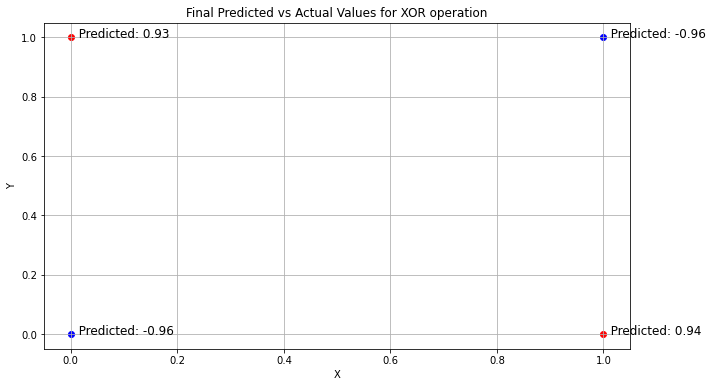

In [13]:
actual_values = [-1, 1, 1, -1]
final_predictions = [val1, val2, val3, val4]
xor_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
#graph
plt.figure(figsize=(10.5, 6))
for i in range(4):
    plt.scatter(*xor_pairs[i], c='red' if actual_values[i] > 0 else 'blue')
    plt.text(xor_pairs[i][0], xor_pairs[i][1], f"  Predicted: {final_predictions[i]:.2f}", fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Predicted vs Actual Values for XOR operation')
plt.grid(True)

# Save the figure in 'graph/xor.png'
plt.savefig('graph/xor.png')
